In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import math
import random

In [4]:
n = 5000
R = 14

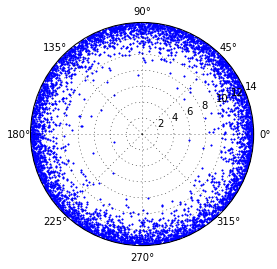

In [5]:
listRaduis = np.zeros(n)
listAngle = np.zeros(n)
for i in range(0,n):
    listRaduis[i] = math.acosh( 1 +  np.random.uniform(0,1) * (math.cosh(R)-1))
    listAngle[i] =  2 * np.pi * np.random.uniform(0,1)

plt.polar(listAngle, listRaduis,'.',markersize=3)
plt.show()

In [7]:
distance_matrix = np.zeros((n, n),int)
np.fill_diagonal(distance_matrix, 0)
for i in range(0,n):
    for j in range(0,n):
        distance = math.cosh(listRaduis[i])*math.cosh(listRaduis[j]) - math.sinh(listRaduis[i])*math.sinh(listRaduis[j])* math.cos(listAngle[i]-listAngle[j])
        if distance <= math.cosh(R):
            if(i!=j):
                distance_matrix[i][j] = 1

In [25]:
degree_array = np.zeros((n))
degree_array[0]=0
for i in range(0,n):
    for j in range(i+1,n):
        if distance_matrix[i][j] ==1:
            if i!=j:
                degree_array[i] = degree_array[i]+1
                degree_array[j] = degree_array[j]+1

In [36]:
mean = np.mean(degree_array)
mean

11.0724

In [37]:
mean_theory = (8/np.pi)*n*(math.exp(((-1*R)/2)))
mean_theory

11.610441786748376

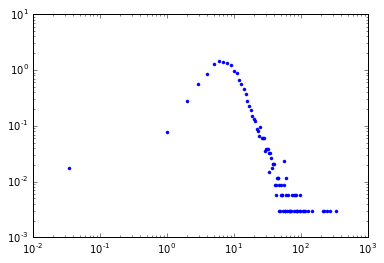

In [42]:
hist, bins = np.histogram(degree_array,bins=n,normed="True")
bin_centres = (bins[:-1] + bins[1:])*0.5
plt.loglog(bin_centres,hist,'.')